<a href="https://colab.research.google.com/github/SowruvMinhajTaher/TensorFlow2/blob/master/mnist_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import *
import seaborn as sns
from tensorflow.keras.utils import to_categorical

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
x_train[0].shape #shape of an image

(28, 28)

In [7]:
# pixel of an image
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

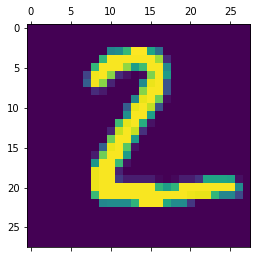

In [8]:
plt.matshow(x_test[1])

In [9]:
#normalization
x_test = x_test/255
x_train = x_train/255

In [10]:
x_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:

#flatten the images into 28*28 = 784
x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1,784)

In [13]:
x_train[1].shape

(784,)

In [14]:
#sequential model
#output layer 10, softmax
from keras.layers import Dense
model = keras.Sequential()
model.add(Dense(64, activation = 'relu', input_dim = 784)) # input layer
model.add(Dense(64, activation = 'relu')) # hidden layer
model.add(Dense(10, activation = 'softmax')) # output layer


In [15]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
              )

In [16]:
model.fit(x_train, 
          to_categorical(y_train),
          epochs=20,
          batch_size=32,
          )


Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2857 - accuracy: 0.9172
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1259 - accuracy: 0.9621
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0896 - accuracy: 0.9728
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0703 - accuracy: 0.9786
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0590 - accuracy: 0.9810
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0471 - accuracy: 0.9850
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0392 - accuracy: 0.9874
Epoch 8/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0358 - accuracy: 0.9887
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0299 - accuracy: 0.9903
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.026

In [17]:
model.evaluate(x_test, to_categorical(y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.1211 - accuracy: 0.9792


[0.12111290544271469, 0.979200005531311]

In [18]:
pred = model.predict(x_test)
pred

array([[1.9262200e-15, 3.8287429e-12, 2.4098589e-11, ..., 1.0000000e+00,
        1.2340106e-12, 6.5041125e-11],
       [1.4911187e-11, 4.6619418e-16, 1.0000000e+00, ..., 3.9348802e-23,
        1.3329602e-13, 4.7773513e-27],
       [2.4073163e-08, 9.9998236e-01, 2.2008631e-07, ..., 5.2680011e-06,
        9.0872500e-06, 1.0535032e-09],
       ...,
       [2.5058090e-26, 1.7408769e-17, 4.4204251e-24, ..., 1.9158563e-13,
        4.8993644e-19, 7.6694144e-09],
       [1.6688585e-27, 2.4765980e-25, 1.1093954e-26, ..., 2.9120628e-25,
        3.5793024e-14, 3.5671408e-27],
       [4.1254151e-17, 1.1098667e-16, 6.4372778e-16, ..., 5.1965910e-22,
        7.2774265e-19, 1.5834630e-29]], dtype=float32)

In [19]:
np.argmax(pred[1])

2

Text(69.0, 0.5, 'Truth Values')

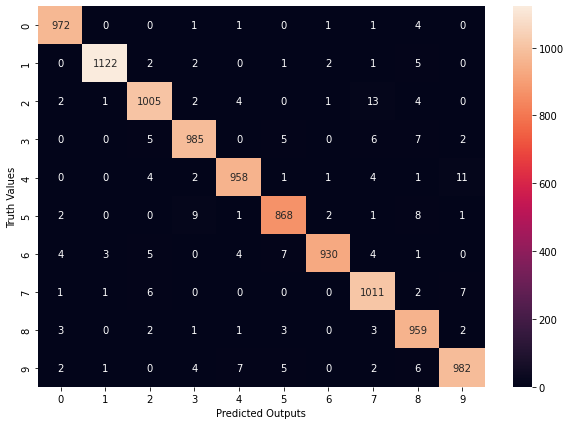

In [23]:
y_pred = model.predict(x_test)
y_pred = [np.argmax(i) for i in y_pred]
con_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(con_matrix,annot=True, fmt='d')
plt.xlabel('Predicted Outputs')
plt.ylabel('Truth Values')